In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [3]:
train_path='/kaggle/input/home-data-for-ml-course/train.csv'
test_path='/kaggle/input/home-data-for-ml-course/test.csv'
train_data=pd.read_csv(train_path)
test_data=pd.read_csv(test_path)

In [4]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
print('Train shaping is : ',train_data.shape)
print('Train shaping[0] is : ',train_data.shape[0])
print('Train shaping[1] is : ',train_data.shape[1])
print('Test shaping is : ',test_data.shape)
print('Test shaping[0] is : ',test_data.shape[0])
print('Test shaping[1] is : ',test_data.shape[1])

Train shaping is :  (1460, 81)
Train shaping[0] is :  1460
Train shaping[1] is :  81
Test shaping is :  (1459, 80)
Test shaping[0] is :  1459
Test shaping[1] is :  80


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
train_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [10]:
drop_col=['Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature']

In [11]:
train_data.drop(drop_col,axis=1,inplace=True)
test_data.drop(drop_col,axis=1,inplace=True)

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [13]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

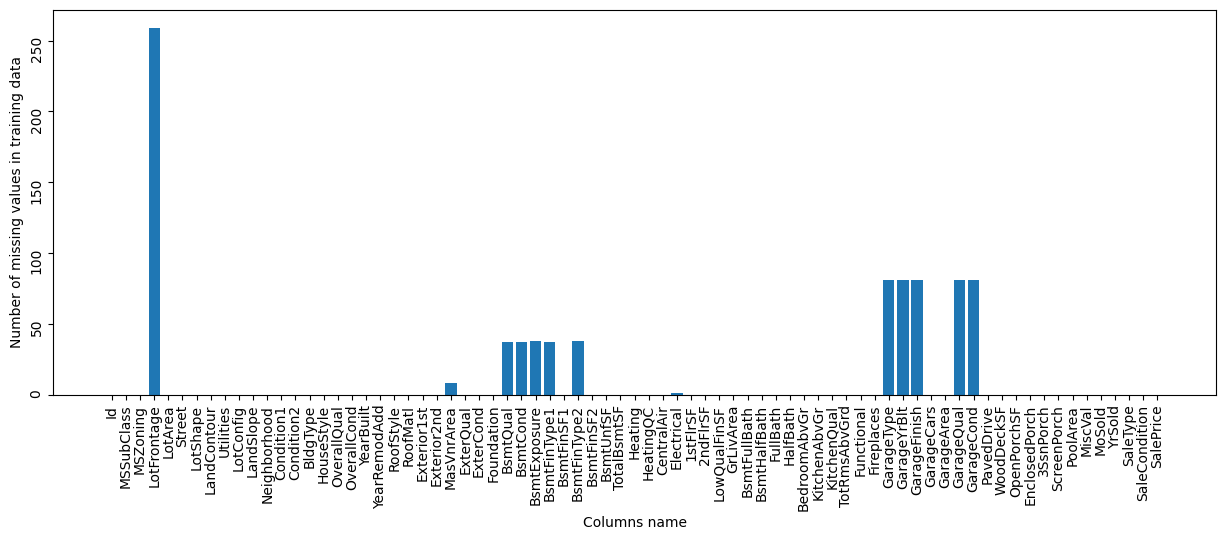

In [14]:
plt.figure(figsize = (15,5))
plt.bar(train_data.columns, train_data.isna().sum())
plt.xlabel("Columns name")
plt.ylabel("Number of missing values in training data")
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.show()

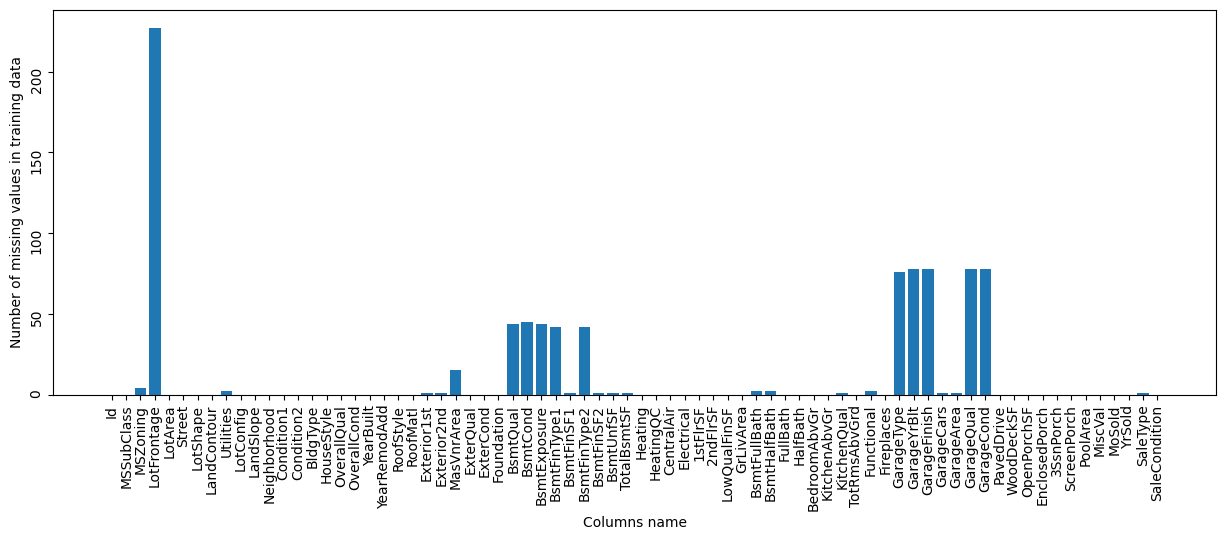

In [15]:
plt.figure(figsize = (15,5))
plt.bar(test_data.columns, test_data.isna().sum())
plt.xlabel("Columns name")
plt.ylabel("Number of missing values in training data")
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.show()

In [16]:
train_data['LotFrontage'].value_counts()

LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: count, Length: 110, dtype: int64

In [17]:
for data in train_data:
    if train_data[data].isnull().sum()>0:
        print(data)

LotFrontage
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond


In [18]:

for data in train_data:
    if train_data[data].isnull().sum()>0:
        print(train_data[data].value_counts())
        print('*'*20)
    

LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: count, Length: 110, dtype: int64
********************
MasVnrArea
0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: count, Length: 327, dtype: int64
********************
BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64
********************
BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64
********************
BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64
********************
BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64
********************
BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64
********************
Electrical
SBrkr 

In [19]:

for data in test_data:
    if test_data[data].isnull().sum()>0:
        print(test_data[data].value_counts())
        print('*'*20)

MSZoning
RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: count, dtype: int64
********************
LotFrontage
60.0     133
80.0      68
70.0      63
50.0      60
75.0      52
        ... 
117.0      1
31.0       1
119.0      1
25.0       1
140.0      1
Name: count, Length: 115, dtype: int64
********************
Utilities
AllPub    1457
Name: count, dtype: int64
********************
Exterior1st
VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
CBlock       1
Name: count, dtype: int64
********************
Exterior2nd
VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
AsphShn      1
Stone        1
Name: count, dtype: int64
********************
MasVnrArea
0.0       877
176.0      10


In [20]:
combined_data = [train_data, test_data]

In [21]:
for data in combined_data:
    for i in data:
        if data[i].dtypes=='int64' or data[i].dtypes=='float64':
            data[i].fillna(data[i].mean(),inplace=True)
    

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le=LabelEncoder()

In [24]:
for data in combined_data:
    for i in data:
        if data[i].dtypes=='object':
            data[i].fillna(data[i].value_counts().keys()[0],inplace=True)

In [25]:
for data in combined_data:
    for i in data:
        if data[i].dtypes=='object':
            data[i]=le.fit_transform(data[i])

In [26]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [27]:
X_train = train_data.drop("SalePrice", axis=1)
Y_train = train_data["SalePrice"]

In [28]:
print("shape of X_train",X_train.shape)
print("Shape of Y_train",Y_train.shape)

shape of X_train (1460, 74)
Shape of Y_train (1460,)


In [29]:
rf_model = RandomForestRegressor(random_state=1)

In [30]:
rf_model.fit(X_train, Y_train)

RandomForestRegressor(random_state=1)

In [31]:
rf_train_predictions=rf_model.predict(X_train)

In [32]:
rf_val_predictions = rf_model.predict(test_data)

In [33]:
rf_val_predictions

array([127243.66, 154558.25, 181908.98, ..., 153520.09, 115764.  ,
       224307.33])

In [34]:
rf_val_mae = mean_squared_error(Y_train,rf_train_predictions)

In [35]:
print("Validation MSE for Random Forest Model: {:,.0f}".format(rf_val_mae))

Validation MSE for Random Forest Model: 113,317,467


In [36]:
outputRF = pd.DataFrame({'Id': test_data.Id,
                       'SalePrice': rf_val_predictions})
outputRF.to_csv('submissionRF.csv', index=False)

In [37]:
gpr=GradientBoostingRegressor(random_state=1)

In [38]:
gpr.fit(X_train, Y_train)

GradientBoostingRegressor(random_state=1)

In [39]:
gpr_train_predictions=gpr.predict(X_train)

In [40]:
gpr_test_predictions=gpr.predict(test_data)

In [41]:
gpr_val_mae =mean_squared_error(Y_train,gpr_train_predictions)
print("Validation MSE for Random Forest Model: {:,.0f}".format(gpr_val_mae))

Validation MSE for Random Forest Model: 226,499,550


In [42]:
outputGPR = pd.DataFrame({'Id': test_data.Id,
                       'SalePrice': gpr_test_predictions})
outputGPR.to_csv('submissionGPR.csv', index=False)

In [43]:
import tensorflow as tf
import keras
from keras.layers import Dense,Dropout

In [44]:
X_train.shape

(1460, 74)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               9600      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 17,921
Trainable params: 17,921
Non-trainable params: 0
_________________________________________________________________


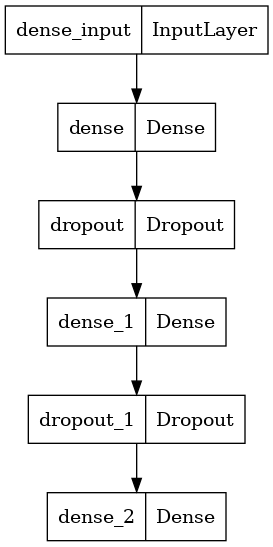

In [45]:
model=keras.Sequential([
    Dense(128,activation='relu',input_shape=(74,)),
    Dropout(.5),
    Dense(64,activation='relu'),
    Dropout(.5),
    Dense(1)
])
model.summary()

optmizer=tf.keras.optimizers.RMSprop(0.001)
model.compile(optimizer=optmizer,loss='mean_squared_error',metrics=['mean_squared_error'])
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
    show_trainable=False
)

In [46]:
history=model.fit(X_train,Y_train,epochs=100,validation_split=.2,batch_size=64,verbose=2)

Epoch 1/100
19/19 - 1s - loss: 35430780928.0000 - mean_squared_error: 35430780928.0000 - val_loss: 32072161280.0000 - val_mean_squared_error: 32072161280.0000 - 1s/epoch - 74ms/step
Epoch 2/100
19/19 - 0s - loss: 26611482624.0000 - mean_squared_error: 26611482624.0000 - val_loss: 20463196160.0000 - val_mean_squared_error: 20463196160.0000 - 79ms/epoch - 4ms/step
Epoch 3/100
19/19 - 0s - loss: 16967546880.0000 - mean_squared_error: 16967546880.0000 - val_loss: 11527231488.0000 - val_mean_squared_error: 11527231488.0000 - 77ms/epoch - 4ms/step
Epoch 4/100
19/19 - 0s - loss: 11156826112.0000 - mean_squared_error: 11156826112.0000 - val_loss: 7015770624.0000 - val_mean_squared_error: 7015770624.0000 - 73ms/epoch - 4ms/step
Epoch 5/100
19/19 - 0s - loss: 9479485440.0000 - mean_squared_error: 9479485440.0000 - val_loss: 5829651968.0000 - val_mean_squared_error: 5829651968.0000 - 72ms/epoch - 4ms/step
Epoch 6/100
19/19 - 0s - loss: 8286035968.0000 - mean_squared_error: 8286035968.0000 - val_l

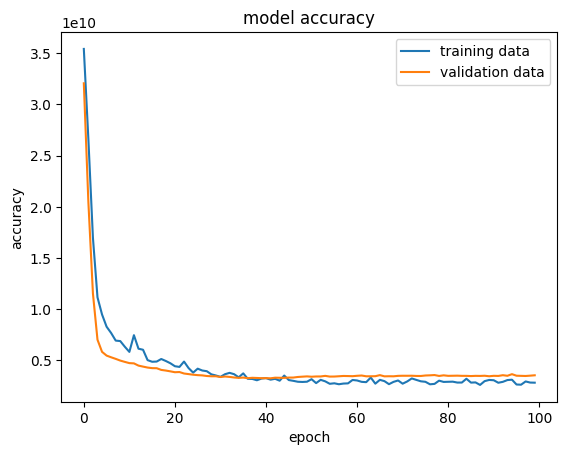

In [47]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

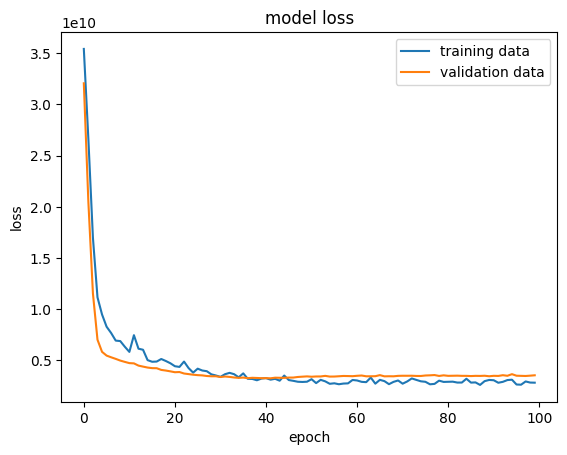

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [49]:
test_pred= model.predict(test_data)

46/46 [==============================] - 0s 1ms/step


In [50]:
test_pred

array([[143374.44],
       [166566.7 ],
       [189142.86],
       ...,
       [194667.89],
       [ 98687.56],
       [228745.8 ]], dtype=float32)

In [51]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [52]:
reg.fit(X_train,Y_train)

LinearRegression()

In [53]:
reg_train_predictions=reg.predict(X_train)

In [54]:
reg_train_predictions

array([220547.90217654, 201405.71517061, 225586.42051962, ...,
       247963.66604209, 150120.90082648, 153562.72466372])

In [55]:
reg_test_predictions=reg.predict(test_data)

In [56]:
reg_val_mae =mean_squared_error(Y_train,reg_train_predictions)
print("Validation MSE for Random Forest Model: {:,.0f}".format(gpr_val_mae))

Validation MSE for Random Forest Model: 226,499,550


In [57]:
outputREG = pd.DataFrame({'Id': test_data.Id,
                       'SalePrice': reg_test_predictions})
outputREG.to_csv('submissionREG.csv', index=False)

In [58]:
outputREG

,Id,SalePrice
0,1461,104042.343191
1,1462,151397.005545
2,1463,165148.193413
3,1464,183186.379644
4,1465,186376.411264
...,...,...
1454,2915,61521.349620
1455,2916,53757.983217
1456,2917,140247.458424
1457,2918,111247.917154
